In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [474]:
digits = load_digits()
digits.data
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [475]:
dir(digits)
# digits.feature_names

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [476]:
x = df.drop('target',axis='columns')
y = df['target']

In [477]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [478]:
print(len(x_train),len(x_test))

1437 360


In [479]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9888888888888889

In [480]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.9916666666666667

In [481]:
knn3 = KNeighborsClassifier(n_neighbors=11)
knn3.fit(x,y)
knn3.score(x_test,y_test)

0.9916666666666667

In [482]:
yp = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,yp)

Text(33.22222222222222, 0.5, 'Actual')

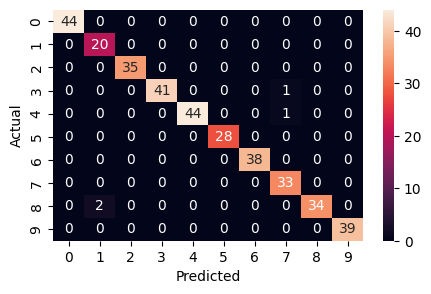

In [483]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [484]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        35
           3       1.00      0.98      0.99        42
           4       1.00      0.98      0.99        45
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        38
           7       0.94      1.00      0.97        33
           8       1.00      0.94      0.97        36
           9       1.00      1.00      1.00        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [485]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1,3,5,7,9,11,13],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan','minkowski']
}

knn_ = KNeighborsClassifier()

grid_search = GridSearchCV(knn_,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [486]:
print('Best Parameters:',grid_search.best_params_)
print("Best score",grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best score 0.98329945799458


In [487]:
best_knn = grid_search.best_estimator_

best_knn.score(x_test,y_test)

0.9916666666666667

In [489]:
knn4 = KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='euclidean')
knn4.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)